# Preprocess and Visualize the dataset

In [22]:
#Import the necessary library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns
import numpy as np

In [13]:
df_filter=pd.read_csv('rhessi_full2002_2018_filtered.csv')
df_1=pd.read_csv('Solar_flare_RHESSI_2004_05.csv')
df_2=pd.read_csv('Solar_flare_RHESSI_2015_16.csv')

In [4]:
#First 5 column of filter_dataset
df_filter.head()

,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.4,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f
0,712,136,167304.0,12-25,592,-358,692,0,A1,P1,...,NaN,NaN,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12,12,25
1,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,...,Q1,NaN,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12,6,12
2,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,...,NaN,NaN,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13,6,12
3,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,...,NaN,NaN,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,2002,2,13,12,25
4,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,...,PE,Q2,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,2002,2,13,25,50


In [5]:
#First 5 column of the first dataset (2004-005)
df_1.head()

,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.4,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f
0,196,592,644352.0,6-12,-966,-207,988,536,A0,DR,...,P1,Q2,2004-01-01 00:39:36,2004-01-01 00:40:06,2004-01-01 00:42:52,2004,1,1,6,12
1,588,592,1838208.0,6-12,-967,-200,987,536,A0,DR,...,Q1,NaN,2004-01-01 00:42:52,2004-01-01 00:43:34,2004-01-01 00:52:40,2004,1,1,6,12
2,712,1456,2815104.0,12-25,964,172,979,528,A0,P1,...,NaN,NaN,2004-01-01 01:06:56,2004-01-01 01:14:26,2004-01-01 01:18:48,2004,1,1,12,25
3,1096,3824,12128496.0,12-25,-972,-137,982,0,A0,DR,...,PE,Q2,2004-01-01 01:18:48,2004-01-01 01:29:22,2004-01-01 01:37:04,2004,1,1,12,25
4,452,200,476352.0,6-12,-978,-249,1009,536,A0,DR,...,P1,PE Q3,2004-01-01 02:21:20,2004-01-01 02:21:34,2004-01-01 02:28:52,2004,1,1,6,12


In [26]:
# Convert date to datetime object
df_1['dt.start'] = pd.to_datetime(df_1['dt.start'])

In [6]:
#First 5 column of the second dataset (2015-2016)
df_2.head()

,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.4,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f
0,180,32,13128.0,6-12,-780,-71,784,2253,A0,P1,...,Q1,NaN,2015-01-01 00:21:52,2015-01-01 00:22:18,2015-01-01 00:24:52,2015,1,1,6,12
1,932,42,70812.0,6-12,-776,-73,780,2253,A0,P1,...,Q1,NaN,2015-01-01 00:24:52,2015-01-01 00:31:26,2015-01-01 00:40:24,2015,1,1,6,12
2,284,20,13308.0,6-12,-780,-66,783,2253,A0,P1,...,Q1,NaN,2015-01-01 00:40:24,2015-01-01 00:41:26,2015-01-01 00:45:08,2015,1,1,6,12
3,144,64,13728.0,6-12,-761,-53,763,2253,A0,DR,...,PE,Q2,2015-01-01 00:56:48,2015-01-01 00:57:46,2015-01-01 00:59:12,2015,1,1,6,12
4,64,20,3216.0,6-12,-780,-65,783,2253,A0,P1,...,Q1,NaN,2015-01-01 01:12:32,2015-01-01 01:12:38,2015-01-01 01:13:36,2015,1,1,6,12


In [10]:
#Function to generate a brief summary of a row in our dataset
def generate_summary(row):
    return (f"Flare {row['flare']} occurred on {row['start.date']} starting at {row['start.time']}, "
            f"peaking at {row['peak']} with a peak count rate of {row['peak.c/s']} c/s, "
            f"and ending at {row['end']}. The flare lasted {row['duration.s']} seconds, "
            f"had a total count of {row['total.counts']}, and was observed in the {row['energy.kev']} energy band. "
            f"The flare was located at ({row['x.pos.asec']}, {row['y.pos.asec']}) in arcsec from the sun center, "
            f"with a radial distance of {row['radial']} arcsec.")

# Task 1: Solar Flare Intensity Estimation
(Use set 1 (2004 – 2005) for this task)

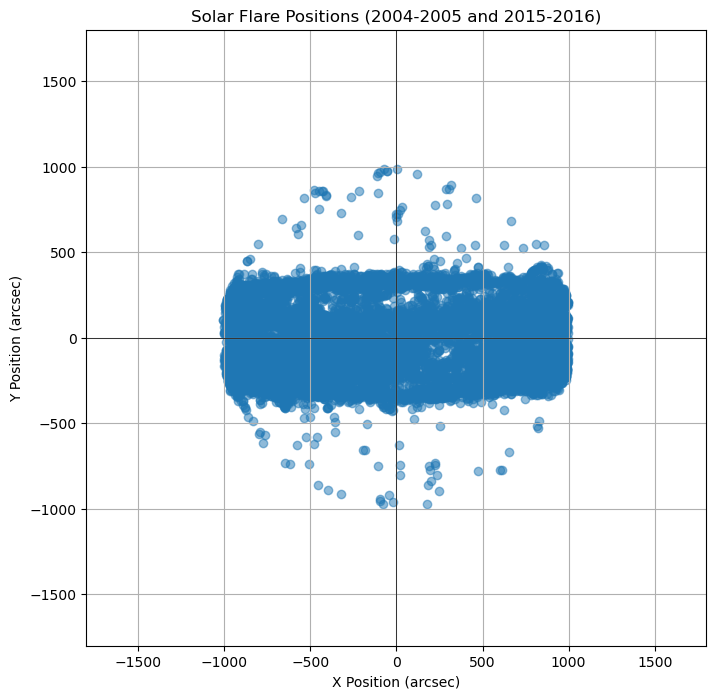

In [14]:
#Visualize the data
plt.figure(figsize=(8, 8))
plt.scatter(df_1['x.pos.asec'], df_1['y.pos.asec'], alpha=0.5)
plt.xlim(-1800, 1800)
plt.ylim(-1800, 1800)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X Position (arcsec)')
plt.ylabel('Y Position (arcsec)')
plt.title('Solar Flare Positions (2004-2005 and 2015-2016)')
plt.grid(True)
plt.show()

**Subtask 1: Develop method 1**


In [15]:
def intensity_method_1(data):
    intensity_map = data.groupby(['x.pos.asec', 'y.pos.asec'])['total.counts'].sum().unstack(fill_value=0)
    return intensity_map

/var/folders/ys/42bcxl856rb223vp8m020glh0000gn/T/ipykernel_3635/2556895037.py:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(x='x.pos.asec', y='y.pos.asec', hue='energy.kev', palette=palette, data=df_1, s=50)


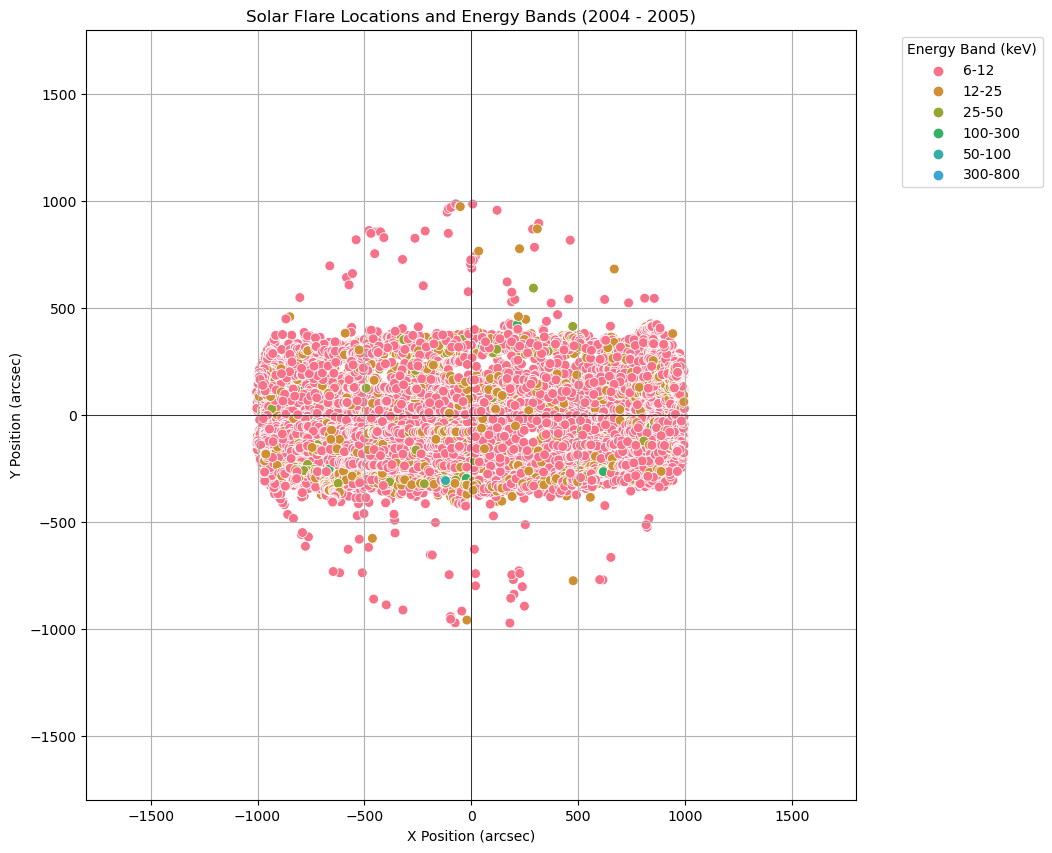

In [21]:
#Visualize data location and energy bands for the first dataset
plt.figure(figsize=(10, 10))
palette = sns.color_palette("husl", 8)
sns.scatterplot(x='x.pos.asec', y='y.pos.asec', hue='energy.kev', palette=palette, data=df_1, s=50)
plt.title('Solar Flare Locations and Energy Bands (2004 - 2005)')
plt.xlabel('X Position (arcsec)')
plt.ylabel('Y Position (arcsec)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim([-1800, 1800])
plt.ylim([-1800, 1800])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(title='Energy Band (keV)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Method 1:  calculating the flare intensity at each location based on the 'total.counts' attribute. We can do this by summing up the 'total.counts' for each flare event at a particular location. Since flare events can happen at different (X, Y) locations, we might need to bin the locations into a grid to calculate the intensity at each grid cell.**

/var/folders/ys/42bcxl856rb223vp8m020glh0000gn/T/ipykernel_3635/2147734649.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  intensity_map = intensity_map.pivot('y.pos.asec', 'x.pos.asec', 'total.counts')


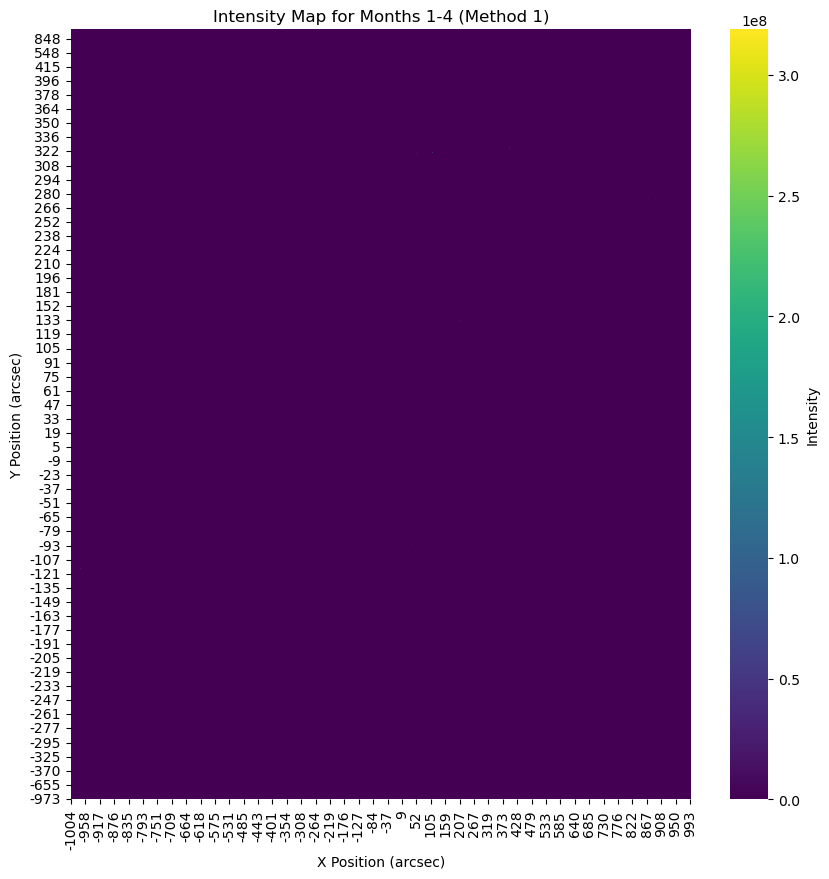

/var/folders/ys/42bcxl856rb223vp8m020glh0000gn/T/ipykernel_3635/2147734649.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  intensity_map = intensity_map.pivot('y.pos.asec', 'x.pos.asec', 'total.counts')


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x1000 with 0 Axes>

In [27]:
# Define function for intensity calculation based on total counts
def calculate_intensity_method_1(df, start_month, end_month):
    filtered_df = df[(df['dt.start'].dt.month >= start_month) & (df['dt.start'].dt.month <= end_month)]
    intensity_map = filtered_df.groupby(['x.pos.asec', 'y.pos.asec'])['total.counts'].sum().reset_index()
    intensity_map = intensity_map.pivot('y.pos.asec', 'x.pos.asec', 'total.counts')
    intensity_map = intensity_map.fillna(0)
    return intensity_map

# Define function for plotting intensity map
def plot_intensity_map(intensity_map, title):
    plt.figure(figsize=(10, 10))
    sns.heatmap(intensity_map, cmap='viridis', cbar_kws={'label': 'Intensity'})
    plt.title(title)
    plt.xlabel('X Position (arcsec)')
    plt.ylabel('Y Position (arcsec)')
    plt.gca().invert_yaxis()  # To match the solar coordinate system
    plt.show()

# Calculate and plot intensity for months 1+2+3+4
intensity_1_4_method_1 = calculate_intensity_method_1(df_1, 1, 4)
plot_intensity_map(intensity_1_4_method_1, 'Intensity Map for Months 1-4 (Method 1)')

# Calculate and plot intensity for months 21+22+23+24
intensity_21_24_method_1 = calculate_intensity_method_1(df_1, 21, 24)
plot_intensity_map(intensity_21_24_method_1, 'Intensity Map for Months 21-24 (Method 1)')
